In [1]:
#import needed libraries
import numpy as np #Linear_Algebra
import matplotlib.pyplot as plt
import pandas as pd #Data_Processing
import pandas_datareader as pdr
from scipy import stats
%matplotlib inline

In [2]:
#Import Yahoo Finance
import yfinance as yf

In [3]:
yf.pdr_override()

In [4]:
#Download NVIDIA stock price data for the past 10 yrs to date
nvda = pdr.get_data_yahoo('NVDA', start = '2009-06-19', end = '2019-06-19')

In [5]:
nvda.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-06-19,11.46,11.03,11.17,11.18,18689100.0,10.314499
2009-06-22,11.22,10.51,11.22,10.55,14371600.0,9.733273
2009-06-23,10.67,10.09,10.65,10.50,14744100.0,9.687141
2009-06-24,11.10,10.63,10.63,10.85,12877400.0,10.010050
2009-06-25,11.44,10.64,10.75,11.42,21761100.0,10.535919
2009-06-26,11.61,11.27,11.37,11.57,12848900.0,10.674309
2009-06-29,11.78,11.45,11.60,11.57,12751400.0,10.674309
2009-06-30,11.69,11.08,11.53,11.29,14746100.0,10.415985
2009-07-01,11.49,11.15,11.36,11.34,17410500.0,10.462115


In [6]:
#Getting the close prices
nvda_close = nvda.Close
nvda_close.head()

Date
2009-06-19    11.18
2009-06-22    10.55
2009-06-23    10.50
2009-06-24    10.85
2009-06-25    11.42
Name: Close, dtype: float64

In [7]:
#Finding log returns by changing the close-close price change
ndva_percent_change = np.log(nvda_close / nvda_close.shift(1)) *100
ndva_percent_change.head()

Date
2009-06-19         NaN
2009-06-22   -5.800062
2009-06-23   -0.475062
2009-06-24    3.278986
2009-06-25    5.120110
Name: Close, dtype: float64

(array([8.48200023e-05, 3.39280009e-04, 1.78122005e-03, 2.90084408e-02,
        1.58952684e-01, 2.12898206e-02, 1.35712004e-03, 5.08920014e-04,
        0.00000000e+00, 8.48200023e-05]),
 array([-20.77116229, -16.08528314, -11.399404  ,  -6.71352486,
         -2.02764571,   2.65823343,   7.34411258,  12.02999172,
         16.71587086,  21.40175001,  26.08762915]),
 <a list of 10 Patch objects>)

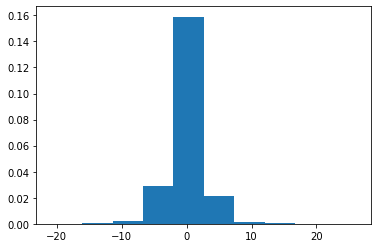

In [8]:
#Check for normality in the log returns
plt.hist(ndva_percent_change[1:], density= True)

In [9]:
#Using Scipy to get more info like skweness, Kurtosis
stats.describe(ndva_percent_change[1:])

DescribeResult(nobs=2516, minmax=(-20.771162287934118, 26.087629152713237), mean=0.10401810019047365, variance=6.604592778144348, skewness=0.3159232023328025, kurtosis=9.541845187334204)

--For investors, the high kurtosis of the return distribution(9.54) implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as kurtosis risk.

--The kurtosis isn't close to 0, so a normal distribution for the returns is not assumed

In [10]:
print('NVIDIA : ', stats.kurtosistest(ndva_percent_change[1:]))

NVIDIA :  KurtosistestResult(statistic=20.911553349618195, pvalue=4.2032383136323974e-97)


--Since the Z value is 20.911 which is higher than 1.96, it leads us to conclude that we're not seeing Kurtosis from a normal distribution

--since the pvalue is <0.05, we reject the null hypothesis, that is, the kurtosis is not from a normal distribution
--There is a very low probability (<0.05) that we're seeing these results from a random chance.